In [66]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
import math


In [67]:

# Read the JSON file
with open('data/events.json', 'r') as file:
    events_data = json.load(file)

# Convert to pandas DataFrame for easier analysis
df = pd.DataFrame(events_data)

# Display the first few rows and basic information about the dataset
print("First few rows of the dataset:")
display(df.head())
print("\nDataset information:")
display(df.info())

First few rows of the dataset:


,endTimestamp,id,message,multiplier,startTimestamp,type,ultra
0,1.609607e+09,covid-1-1-pres,DOUBLE PRESTIGE!,2.00,1.609517e+09,prestige-boost,NaN
1,1.609783e+09,covid-1-1,TRIPLE PIGGY GROWTH!!,3.00,1.609517e+09,piggy-boost,NaN
2,1.609695e+09,covid-1-2,3x EARNINGS!,3.00,1.609605e+09,earnings-boost,NaN
3,1.609784e+09,covid-1-3,3x GIFTS!,3.00,1.609694e+09,gift-boost,NaN
4,1.609872e+09,covid-1-4,75% OFF VEHICLES!,0.25,1.609782e+09,vehicle-sale,NaN



Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1518 entries, 0 to 1517
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   endTimestamp    1518 non-null   float64
 1   id              1518 non-null   object 
 2   message         1518 non-null   object 
 3   multiplier      1518 non-null   float64
 4   startTimestamp  1518 non-null   float64
 5   type            1518 non-null   object 
 6   ultra           420 non-null    object 
dtypes: float64(3), object(4)
memory usage: 83.1+ KB


None

/var/folders/f7/y181b1950cb40n21f21_yfnm0000gn/T/ipykernel_1726/3798274560.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=event_counts.values, y=event_counts.index, ax=ax2, palette='viridis')


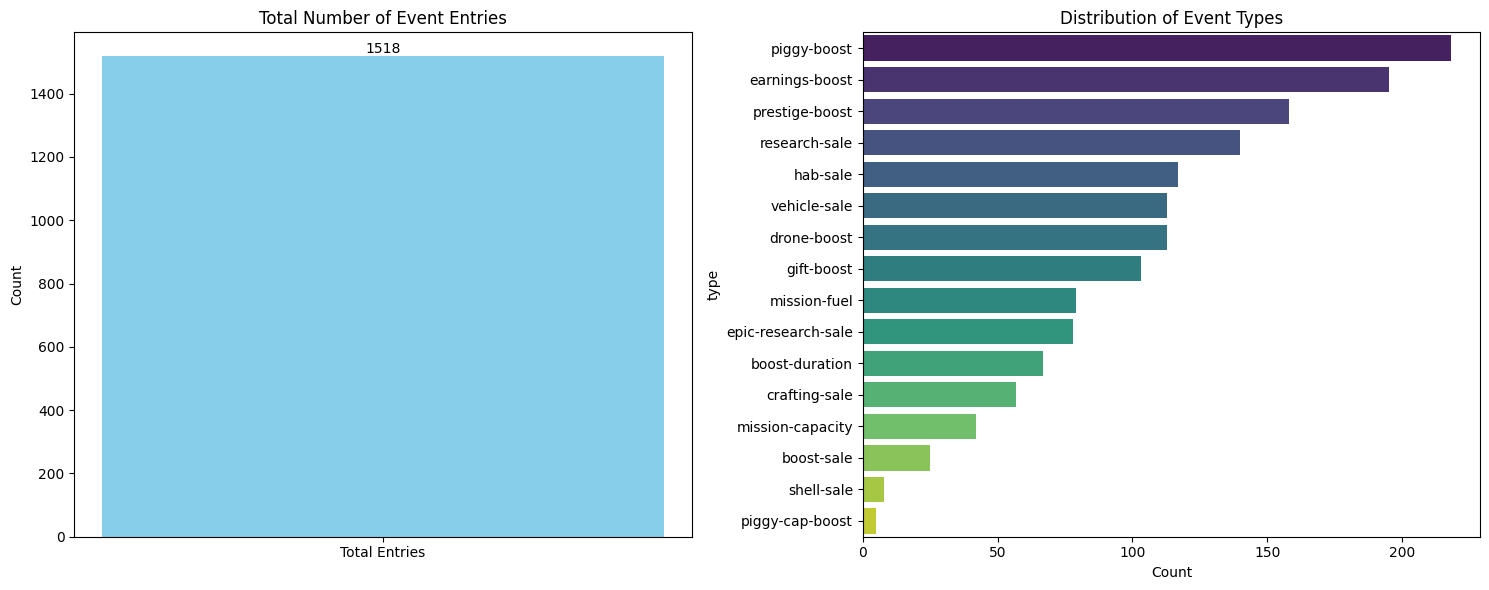


Summary Statistics:
Total number of entries: 1518

Event type distribution:
type
piggy-boost           218
earnings-boost        195
prestige-boost        158
research-sale         140
hab-sale              117
vehicle-sale          113
drone-boost           113
gift-boost            103
mission-fuel           79
epic-research-sale     78
boost-duration         67
crafting-sale          57
mission-capacity       42
boost-sale             25
shell-sale              8
piggy-cap-boost         5
Name: count, dtype: int64


In [68]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the JSON file
with open('data/events.json', 'r') as f:
    events_data = json.load(f)

# Convert to DataFrame
events_data = pd.DataFrame(events_data)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Total number of entries
total_entries = len(events_data)
ax1.bar(['Total Entries'], [total_entries], color='skyblue')
ax1.set_title('Total Number of Event Entries')
ax1.set_ylabel('Count')
ax1.text(0, total_entries, str(total_entries), ha='center', va='bottom')

# Plot 2: Distribution of event types
event_counts = events_data['type'].value_counts()
sns.barplot(x=event_counts.values, y=event_counts.index, ax=ax2, palette='viridis')
ax2.set_title('Distribution of Event Types')
ax2.set_xlabel('Count')

# Adjust layout and display
plt.tight_layout()
plt.show()



# Print summary statistics
print("\nSummary Statistics:")
print(f"Total number of entries: {total_entries}")
print("\nEvent type distribution:")
print(event_counts) 

/var/folders/f7/y181b1950cb40n21f21_yfnm0000gn/T/ipykernel_1726/3265955902.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/f7/y181b1950cb40n21f21_yfnm0000gn/T/ipykernel_1726/3265955902.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/f7/y181b1950cb40n21f21_yfnm0000gn/T/ipykernel_1726/3265955902.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(
/var/folders/f7/y181b1950cb40n21f21_yfnm0000gn/T/ipykernel_1726/3265955902.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated

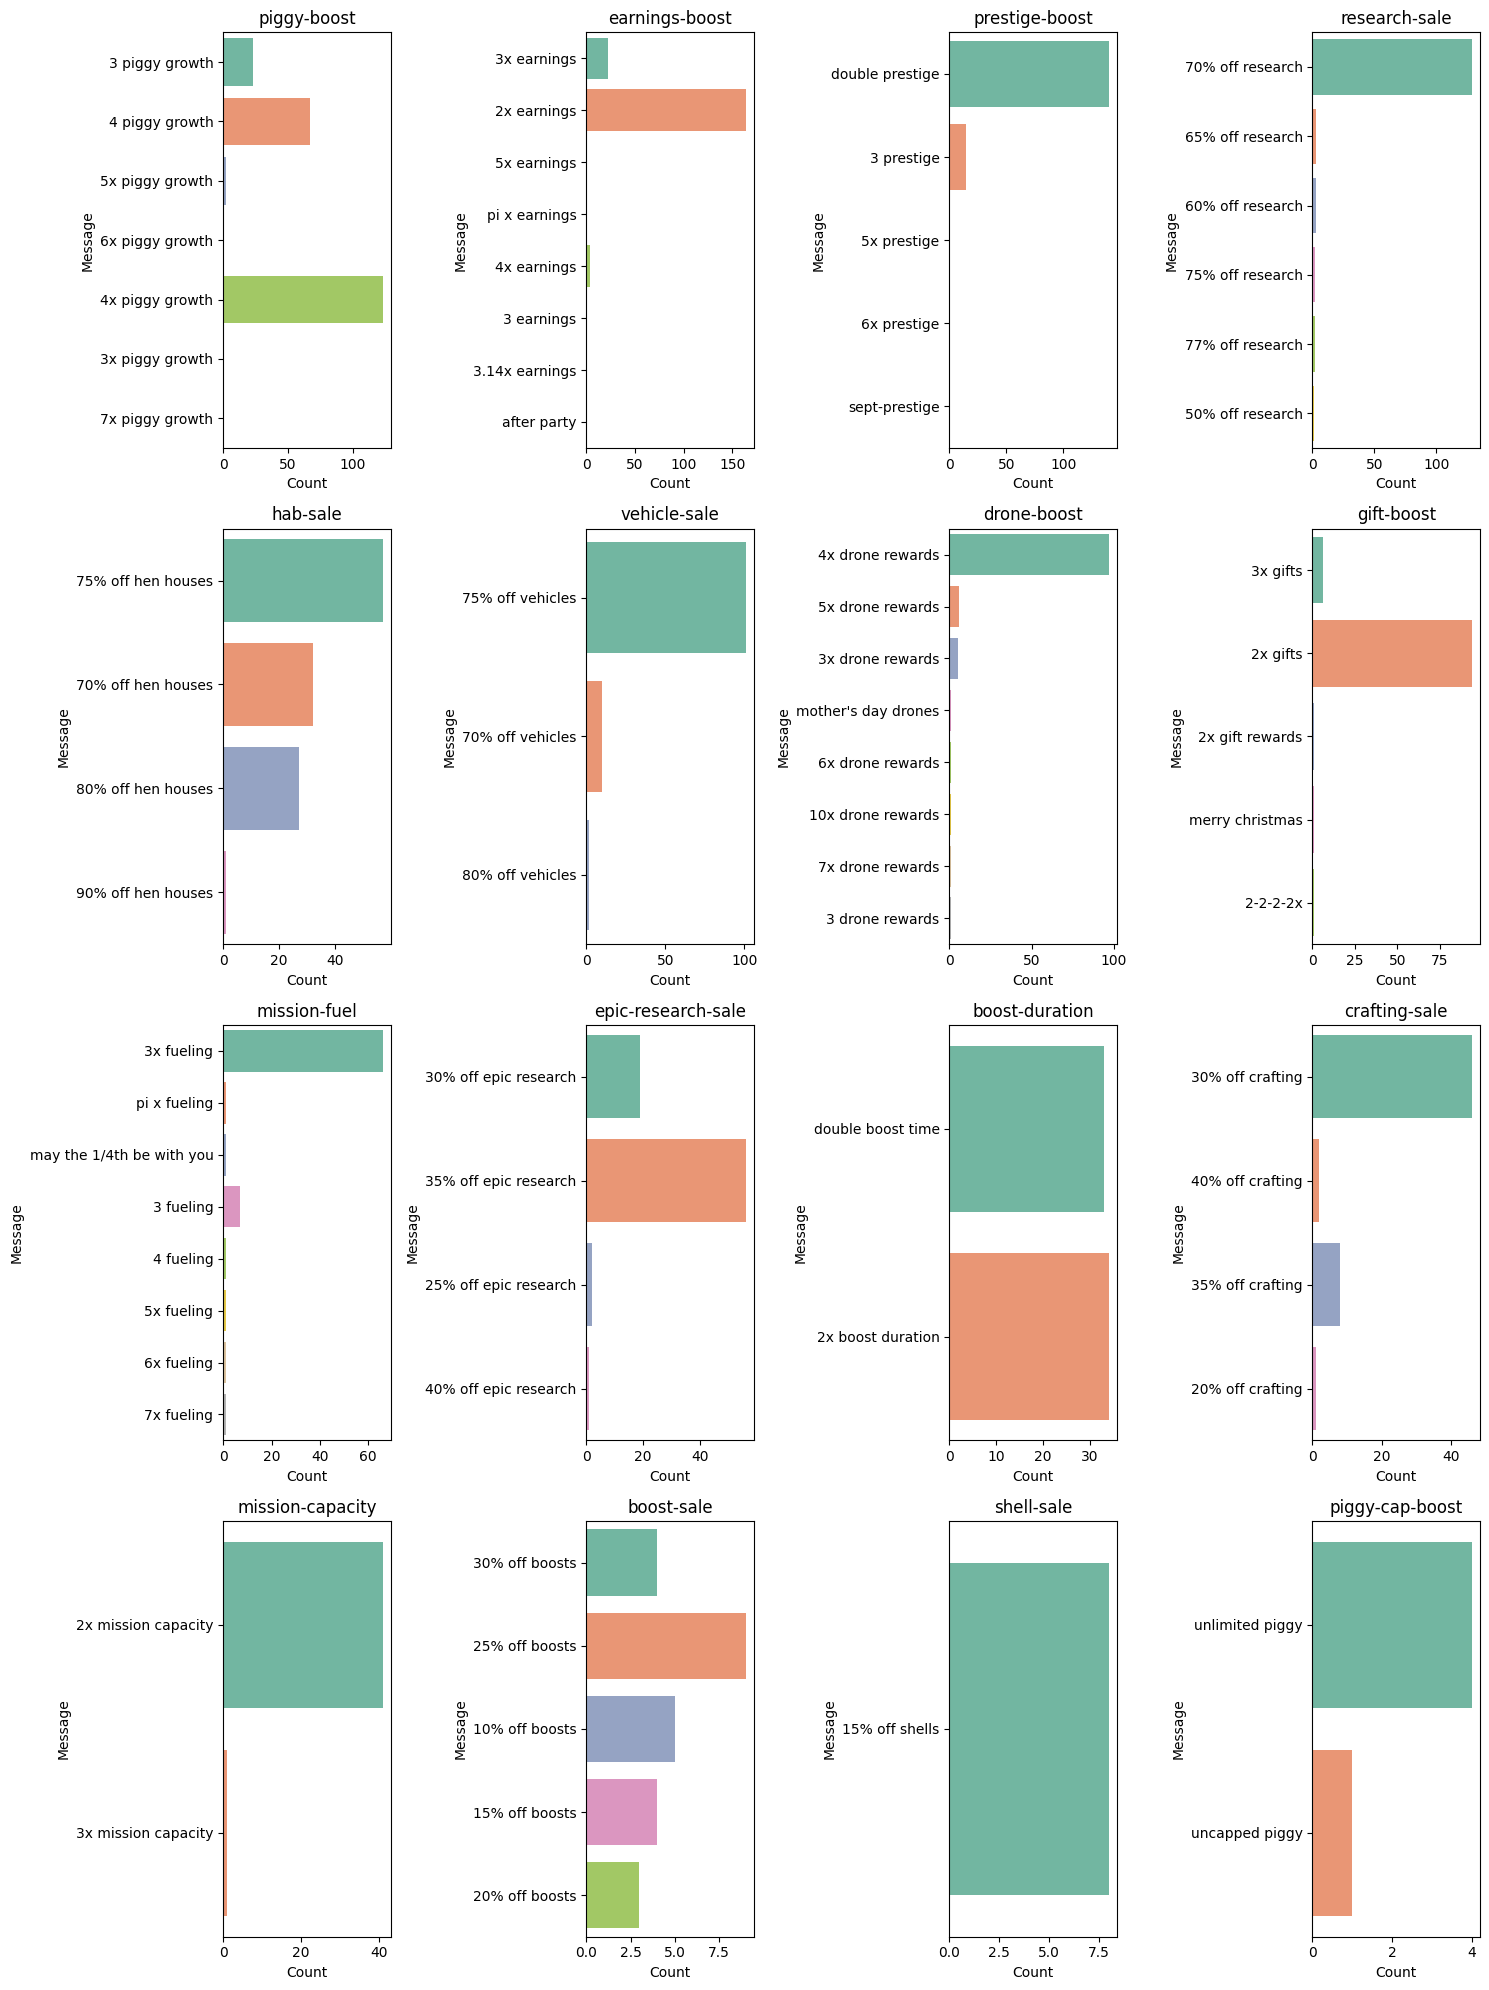

In [69]:
# convert messages to all lower case
events_data['message'] = events_data['message'].str.lower()
#clean up messages befor plotting (only)
events_data['message'] = events_data['message'].str.replace(r'!', '', regex=True)
# triple and quad needs to be a number 
events_data['message'] = events_data['message'].str.replace('triple', '3', case=False)
events_data['message'] = events_data['message'].str.replace('quad', '4', case=False)

# Get unique event types
unique_types = events_data['type'].unique()
num_types = len(unique_types)
# Calculate the number of rows and columns for the grid
num_cols = 4  # Set the desired number of columns
num_rows = math.ceil(num_types / num_cols)

# Create a figure with a grid of subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Sort unique event types by the highest count of messages
sorted_types = events_data['type'].value_counts().index

# Plot each unique event type in sorted order
for ax, event_type in zip(axes, sorted_types):
    sns.countplot(
        data=events_data[events_data['type'] == event_type],
        y='message',
        ax=ax,
        palette='Set2'
    )
    ax.set_title(f'{event_type}')
    ax.set_xlabel('Count')
    ax.set_ylabel('Message')

# Hide any unused subplots
for ax in axes[len(sorted_types):]:
    ax.axis('off')

# Adjust layout to prevent overlap
plt.tight_layout()

# Export the figure to a file
plt.savefig('event_type_message_counts_grid.png')

# Display the figure
plt.show()

